# Notebook es8

The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on two variational parameters: $\sigma$ and $\mu$.

## 08.1 

### Assignment

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

### Solution 

Using Metropolis algorithm, it is possible to estimate the expectation value for the Hamiltonian by extracting many points distributed according the given wave function $\Psi_T^{\sigma,\mu}(x)$. To implement this calculation, I created the class  ```state``` which provides a method to determine a good step lenght for the algorithm and a method to estimate $\langle {\hat H} \rangle_T$ using $M(RT)^2$. 

As an example, I reported the estimation of $\langle {\hat H} \rangle_T$ for the state characterized by $\sigma = 1$ and $\mu = 0$. For the estimation I used $N_{step} = 10^6$ and $N_{block} = 100$.

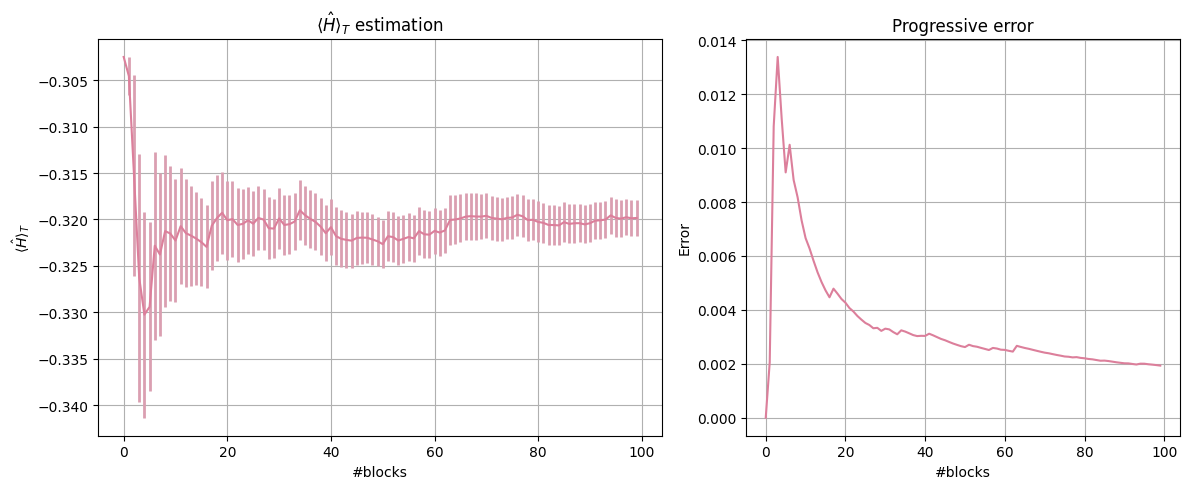

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#load data
H_1 = np.loadtxt("data/H_block.dat")

fig, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1.3, 1]})  

# plotting H estimation
axes[0].errorbar(H_1[:,0] ,H_1[:,1], yerr=H_1[:,2], color='#DC7F9B', ecolor='#DA9FB1', elinewidth=2, capsize=0)
axes[0].set_title(r'$\langle {\hat H} \rangle_T$ estimation')
axes[0].set_xlabel('#blocks')
axes[0].set_ylabel(r'$\langle {\hat H} \rangle_T$')
axes[0].grid(True)

#plotting progressive error
axes[1].plot(H_1[:,0], H_1[:,2], color='#DC7F9B')
axes[1].set_title(r'Progressive error')
axes[1].set_xlabel('#blocks')
axes[1].set_ylabel(r'Error')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## 08.2

### Assignment

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- show a picture of the estimation of $\langle {\hat H} \rangle_T$ and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$
- show also a picture **of the sampled** $|\Psi_T(x)|^2$ by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

### <span style="color:green">Supplementary material</span>

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.

Ground state energy:  -0.46046587969338987
1st excited state energy:  0.09742471331728036
2nd excited state energy:  1.971733134392539


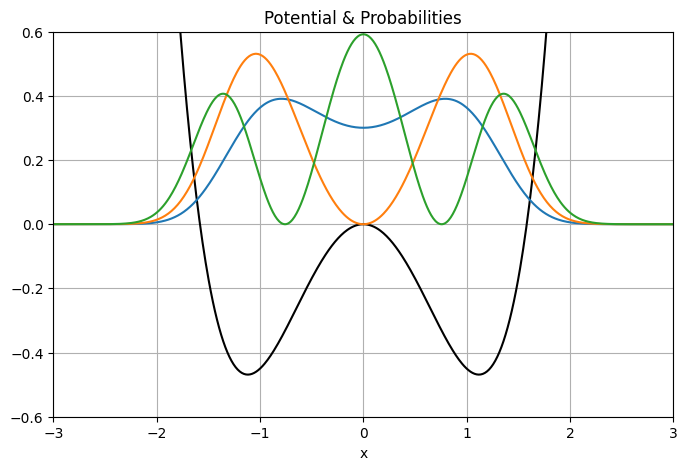

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

### Solution

The Simulated Annealing algorithm is a method to find a global minimum of a given function, ispired by termodynamics. In analogy with the slow cooling process, where a system easily reaches the minimun energy state, SA exploit rejections techniques to find a global minimum of a function. In the case of this exercise I used it to determine an estimation for the ground state of the system. 

Essentially, we can visualize this algorithm as a random walk in the parameter space, where the step is accepted with a probability given by 
\begin{equation}
    P = 
    \begin{cases}
        e^{- \beta [L(x_{new}) - L(x_{old})]} & \text{if } L(x_{new}) > L(x_{old}) \\
        1 & \text{otherwise}
    \end{cases}
\end{equation}
where $L(x)$ it's the loss function and $\beta = \frac{1}{T}$. The specific characteristic of SA is that after a certain number of step the value of $\beta$ is increased, making it more difficult to accept the next steps. 

To implement this method to the specific case of the exercis, I created a new class called ```SA_state``` which contains a ```state``` variable  and the parameters used to describe the evolution of $\beta$ value, such as the number of different $\beta$ used in the process or its initial value. 
In this case I used 100 different value for $\beta$ and for each off them the system tries to do 15 steps. 

The class provides a method to estimate the ground state of the problem, collecting the different parameter values used during the search. In the figure below, I reported the step in the parameter space and the different value of $H$ obtained during the process. From thess plots, it's evident that for the first steps the system explore the parameter space and the energy value are very different, but during the process the system concentrates the search near the minimum. This behaviour is caused by the fact that the value of $\beta$ is increasing.

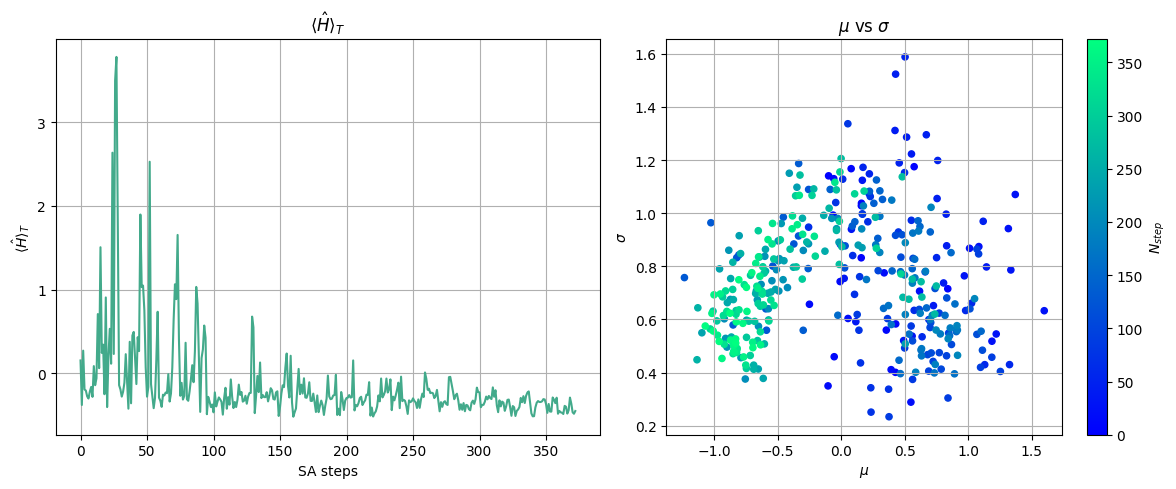

In [4]:
#load data
H_stor = np.loadtxt("data/H_storage.dat")
H_ground = np.loadtxt("data/H_ground.dat")
mu = np.loadtxt("data/mu.dat")
sigma = np.loadtxt("data/sigma.dat")
psi2 = np.loadtxt("data/psi2_points.dat")


fig, ax = plt.subplots(1,2, figsize=(12,5), gridspec_kw={'width_ratios': [1.1, 1]})

# plotting H storage
ax[0].plot(H_stor[:, 0], H_stor[:,1], color='#43AA8B')
ax[0].set_title(r'$\langle {\hat H} \rangle_T$ ')
ax[0].set_xlabel('SA steps')
ax[0].set_ylabel(r'$\langle {\hat H} \rangle_T$')
ax[0].grid(True)

# plotting mu vs sigma
sc = ax[1].scatter(mu[:,1], sigma[:,1], c=mu[:,0], cmap='winter', s=20)
ax[1].set_xlabel(r'$\mu$')
ax[1].set_ylabel(r'$\sigma$')
ax[1].set_title(r'$\mu$ vs $\sigma$')
ax[1].grid(True)
fig.colorbar(sc, ax=ax[1], label=r'$N_{step}$')

plt.tight_layout()
plt.show()

Here I reported the estimation of the energy for the state found with SA algorithm and the distribution of $|\psi|^2$, compared with the numerical solution given in the assignment. These plots shows that the two estimations are slightly different. This difference indicates that SA algorithm provides only an estimate of the ground state and not the exact solution. 

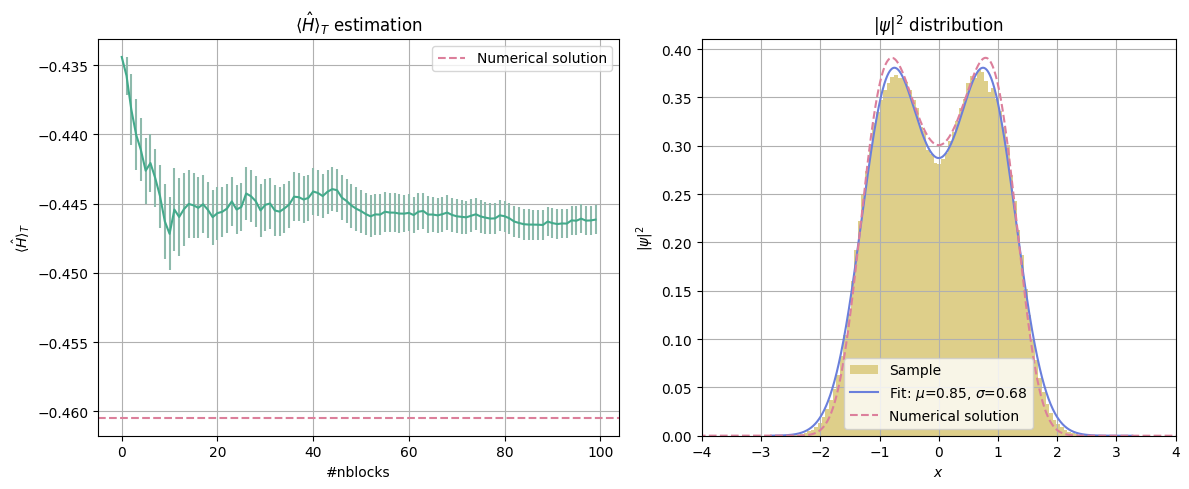

In [5]:
from scipy.optimize import curve_fit

# Fit the psi2 distribution
def wave_func(x, mu, sigma):
    norm = 2 * sigma * np.sqrt(np.pi) * (1 + np.exp(-(mu**2) / (sigma**2)))
    return (1/norm) * (np.exp(-(x - mu)**2 / (2*sigma**2)) + np.exp((-(x + mu)**2 / (2*sigma**2))))**2

counts, bin_edges = np.histogram(psi2[:,1], bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
popt, pcov = curve_fit(wave_func, bin_centers, counts, p0=[0.5, 0.5])
mu_fit, sigma_fit = popt

fig, ax = plt.subplots(1,2, figsize=(12,5), gridspec_kw={'width_ratios': [1.1, 1]})

# plotting H estimation
ax[0].errorbar(H_ground[:,0], H_ground[:,1], yerr=H_ground[:,2], color='#43AA8B', ecolor='#8EBAAC', elinewidth=1.5, capsize=0)
ax[0].set_title(r'$\langle {\hat H} \rangle_T$ estimation')
ax[0].axhline(y=E[0], color='#DC7F9B', linestyle='--', label='Numerical solution')
ax[0].set_xlabel('#nblocks')
ax[0].set_ylabel(r'$\langle {\hat H} \rangle_T$')
ax[0].grid(True)
ax[0].legend()

# plotting psi2 distribution
ax[1].hist(psi2[:,1], bins=100, density=True, color='#DECF8A', linewidth=0.01, label='Sample')
x_fit = np.linspace(bin_edges[0], bin_edges[-1], 1000)
y_fit = wave_func(x_fit, mu_fit, sigma_fit)
ax[1].plot(x_fit, y_fit, color='#6A7FDB', linewidth=1.5, label=f'Fit: $\mu$={mu_fit:.2f}, $\sigma$={sigma_fit:.2f}')
ax[1].plot(x,(psi[0])**2, linestyle='--', color='#DC7F9B', label='Numerical solution')

ax[1].set_title(r'$|\psi|^2$ distribution')
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$|\psi|^2$')
ax[1].set_xlim((-4,4))
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()